## Seaborn Intro

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
from datasets import load_dataset
import ast

#loading Data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#Data Cleanup 
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Install and Import Seaborn

In [4]:
import seaborn as sns

#Only data analyst and in the us data 
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

#drop Nan values from the column
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']]
df_DA_US_group=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_US_group
df_DA_top_pay=df_DA_US_group.sort_values(by='median',ascending=False).head(10)
df_DA_top_pay
df_DA_skills=df_DA_US_group.sort_values('count',ascending=False).head(10).sort_values(by='median',ascending=False).head(10)
df_DA_skills



,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


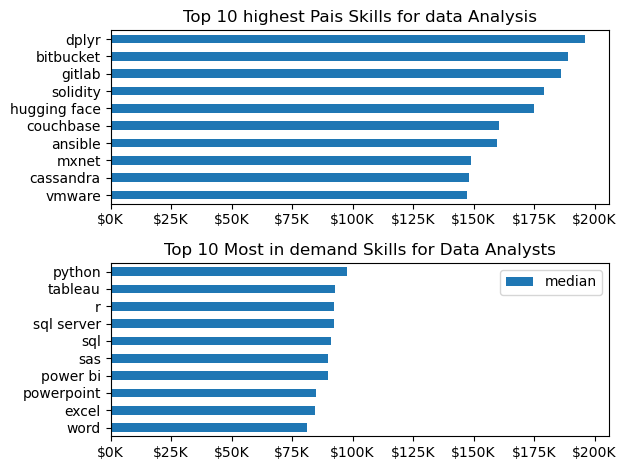

In [5]:
fig,ax=plt.subplots(2,1)

df_DA_top_pay.plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 highest Pais Skills for data Analysis')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
ax[0].invert_yaxis()



df_DA_skills.plot(kind='barh',y='median',ax=ax[1])
ax[1].set_title('Top 10 Most in demand Skills for Data Analysts')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))

fig.tight_layout()

ax[1].set_xlim(ax[0].get_xlim())
ax[1].invert_yaxis()


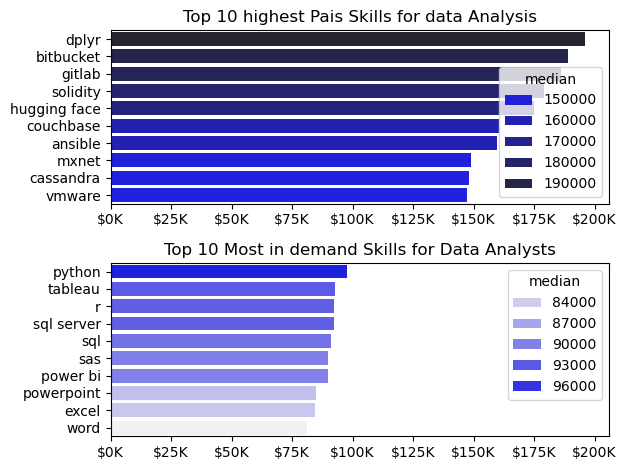

In [6]:
fig,ax=plt.subplots(2,1)

#df_DA_top_pay.plot(kind='barh',y='median',ax=ax[0],legend=False)

sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index,ax=ax[0],hue='median',palette='dark:b_r')
ax[0].set_title('Top 10 highest Pais Skills for data Analysis')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
ax[0].invert_yaxis()



#df_DA_skills.plot(kind='barh',y='median',ax=ax[1])


sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette='light:b')
ax[1].set_title('Top 10 Most in demand Skills for Data Analysts')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))

fig.tight_layout()

ax[1].set_xlim(ax[0].get_xlim())
ax[0].invert_yaxis()



In [7]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

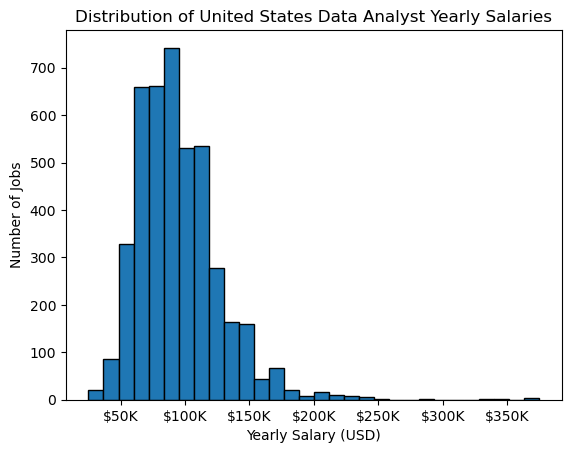

In [8]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

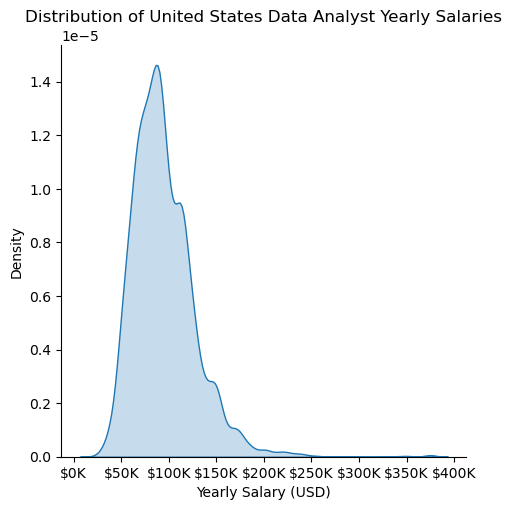

In [9]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True, common_norm=False) #Kde Kernel density estimation

# this is all the same
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density') # Density is the probability of a random variable taking on a particular value
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()